In [1]:
# conda install nltk
# conda install textblob
# conda install spacy
# conda install langdetect
# pip install sentiment-analysis-spanish
# pip install keras tensorflow
# pip install stylecloud

import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
from langdetect import detect
from sentiment_analysis_spanish import sentiment_analysis

#SpaCy
import spacy
from spacy import displacy


In [3]:
df1 = pd.read_csv('../data/juancarlos_2012_2013records.csv')
df = df1.copy()
df = df[['name','year','text']]

In [4]:
df.head()

,name,year,text
0,Juan Carlos I,2012,"Buenas noches,En esta Nochebuena, como cada añ..."
1,Juan Carlos I,2013,«Buenas noches. Quiero expresaros a todos mi c...


In [5]:
def quitar_corchetes (string):
    pattern = "(\[(.*?)\])"
    sin_corchetes = re.sub(pattern, "", string)
    return sin_corchetes

In [6]:
def tokenize(wiped_strng):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = [tokenizer.tokenize(wiped_strng)]
    return tokens

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/cristina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cristina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cristina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
first = tokenize(df['text'][0])

In [11]:
second = tokenize(df['text'][1])

In [12]:
df['toked']=""
df['toked'][0] = first[0]
df['toked'][1] = second[0]

<ipython-input-12-2a2e39f53a2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['toked'][0] = first[0]
<ipython-input-12-2a2e39f53a2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['toked'][1] = second[0]


In [13]:
df['toked'] = df['toked'].apply(lambda x: " ".join(x))

In [14]:
def translate_to_eng(strng):
    spanish_string = TextBlob(strng)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return strng

In [15]:
df['translated'] = df['toked'].apply(translate_to_eng)
df['translated'] = df['translated'].apply(lambda x: x.split(" "))

In [16]:
def stop_words (lst):
    stop_words = set(stopwords.words('english'))
    new_lst = []
    for strng in lst:
        if strng not in stop_words:
            new_lst.append(strng)
    return " ".join(new_lst)

In [17]:
df['translated'] = df['translated'].apply(stop_words)

In [18]:
blob_2012 = TextBlob(df['translated'][0]).sentiment
blob_2013 = TextBlob(df['translated'][1]).sentiment
print(blob_2012)

Sentiment(polarity=0.16534893677750825, subjectivity=0.45573355216212347)


In [19]:
df['sentiment_blob']= ""
df['sentiment_blob'][0]= blob_2012
df['sentiment_blob'][1]=blob_2013


<ipython-input-19-4e4edd35a674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_blob'][0]= blob_2012
<ipython-input-19-4e4edd35a674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_blob'][1]=blob_2013


In [20]:
df['sentiment_blob'] = df.translated.apply()

TypeError: apply() missing 1 required positional argument: 'func'

In [22]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [23]:
df['sentiment_compound'] = df.translated.apply(sentimentAnalysis)

In [24]:
tokes12_eng = tokenize(df['translated'][0])
tokes13_eng = tokenize(df['translated'][1])
fd12 = nltk.FreqDist(tokes12_eng[0])
fd13 = nltk.FreqDist(tokes13_eng[0])

In [25]:
df['most_common']=""
df['most_common'][0] = dict(fd12.most_common(20))
df['most_common'][1] = dict(fd13.most_common(20))

<ipython-input-25-93cdfb526875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['most_common'][0] = dict(fd12.most_common(20))
<ipython-input-25-93cdfb526875>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['most_common'][1] = dict(fd13.most_common(20))


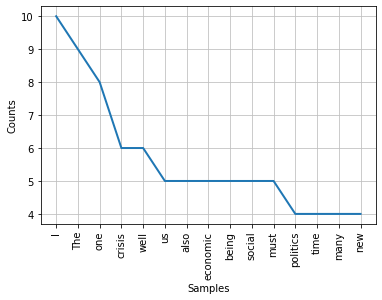

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
fd12.plot(15,cumulative=False)

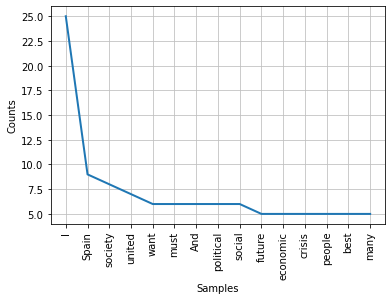

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
fd13.plot(15,cumulative=False)

In [36]:
df

,name,year,text,toked,translated,sentiment_blob,sentiment_compound,most_common
0,Juan Carlos I,2012,"Buenas noches,En esta Nochebuena, como cada añ...",Buenas noches En esta Nochebuena como cada año...,"Good evening. On Christmas Eve, every year, I ...","(0.16534893677750825, 0.45573355216212347)",0.9996,"{'I': 10, 'The': 9, 'one': 8, 'crisis': 6, 'we..."
1,Juan Carlos I,2013,«Buenas noches. Quiero expresaros a todos mi c...,Buenas noches Quiero expresaros a todos mi cor...,Good evening I want express cordial congratula...,"(0.1449963924963925, 0.4195598845598848)",0.9996,"{'I': 25, 'Spain': 9, 'society': 8, 'united': ..."


In [28]:
import wordcloud

In [38]:
df.translated[0]

"Good evening. On Christmas Eve, every year, I want reflect concerns us also hopes. Specifically, I would like refer three issues: economic crisis, strength Spain European Ibero-American nation, need vindicate politics A necessary instrument unite forces tackle way crisis challenges lie ahead I think I exaggerating I say experiencing one difficult moments recent history Spain The serious economic crisis going years reached intensity amplitude persistence time nobody imagined Citizens today suffer rigor putting question well-being families I think many people ages especially many young people get every day feeling insecurity discouragement due difficult situation economies f discharge work uncertain future prospects We cannot ignore pessimism effects felt quality social climate live in. It also generating detachment towards institutions towards political function concerns us all. This pessimism conformism, necessary find new ways ways things demand update The current reality complex alw

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [53]:
stopwords = set(STOPWORDS) 
stopwords.add('I')
stopwords.add('The')
stopwords.add('And')
# equiv = stopwords.update("I", "The", "And")

In [48]:
WC1 = WordCloud(stopwords=stopwords,max_words=25,background_color="white").generate(df.translated[0])
WC2 = WordCloud(stopwords=stopwords,max_words=25,background_color="white").generate(df.translated[1])

In [49]:
import matplotlib.pyplot as plt

In [50]:
from matplotlib import rcParams

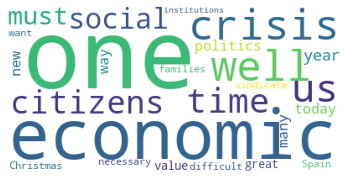

In [51]:
plt.imshow(WC1)
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

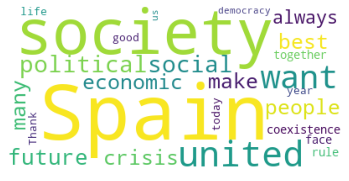

In [52]:
plt.imshow(WC2)
plt.axis("off")
plt.show